In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Metro_Interstate_Traffic_Volume.csv.gz to Metro_Interstate_Traffic_Volume.csv.gz


In [ ]:
import pandas as pd

# Replace the filename if yours is different
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')

# Show the first 5 rows of the dataset
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


**CONVERTING** **THE** **RAW** **DATA** **INTO** **THE** **WORKING** **SET** **FOR** **THE** **PROJECT**

In [ ]:
print(df.isnull().sum()) #filtering out the null values

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


In [ ]:
# Keep only selected columns
df = df[['date_time', 'traffic_volume', 'temp', 'rain_1h', 'clouds_all']]
df.head()


,date_time,traffic_volume,temp,rain_1h,clouds_all
0,2012-10-02 09:00:00,5545,288.28,0.0,40
1,2012-10-02 10:00:00,4516,289.36,0.0,75
2,2012-10-02 11:00:00,4767,289.58,0.0,90
3,2012-10-02 12:00:00,5026,290.13,0.0,90
4,2012-10-02 13:00:00,4918,291.14,0.0,75


In [ ]:
# Convert date_time to datetime object
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract hour and day of week from date_time
df['hour'] = df['date_time'].dt.hour
df['dayofweek'] = df['date_time'].dt.dayofweek  # Monday=0, Sunday=6

df.head()


,date_time,traffic_volume,temp,rain_1h,clouds_all,hour,dayofweek
0,2012-10-02 09:00:00,5545,288.28,0.0,40,9,1
1,2012-10-02 10:00:00,4516,289.36,0.0,75,10,1
2,2012-10-02 11:00:00,4767,289.58,0.0,90,11,1
3,2012-10-02 12:00:00,5026,290.13,0.0,90,12,1
4,2012-10-02 13:00:00,4918,291.14,0.0,75,13,1


In [ ]:
print(df.head())
print(df.info())


            date_time  traffic_volume    temp  rain_1h  clouds_all  hour  \
0 2012-10-02 09:00:00            5545  288.28      0.0          40     9   
1 2012-10-02 10:00:00            4516  289.36      0.0          75    10   
2 2012-10-02 11:00:00            4767  289.58      0.0          90    11   
3 2012-10-02 12:00:00            5026  290.13      0.0          90    12   
4 2012-10-02 13:00:00            4918  291.14      0.0          75    13   

   dayofweek  
0          1  
1          1  
2          1  
3          1  
4          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_time       48204 non-null  datetime64[ns]
 1   traffic_volume  48204 non-null  int64         
 2   temp            48204 non-null  float64       
 3   rain_1h         48204 non-null  float64       
 4   clouds_all      48204 non-nu

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
sns.set(style="darkgrid")

In [ ]:
import seaborn as sns
print(sns.__version__)


0.13.2


In [ ]:
print(df.columns)
df['date_time'] = pd.to_datetime(df['date_time'])  # Convert to datetime format
df['hour'] = df['date_time'].dt.hour  # Extract hour


Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')


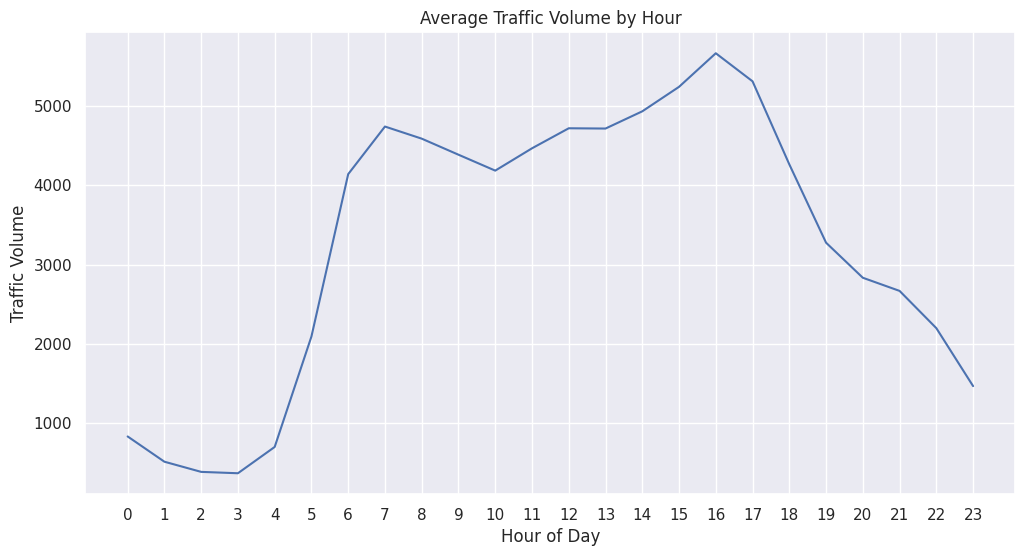

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data
hourly_traffic = df.groupby('hour')['traffic_volume'].mean().reset_index()

# Plot it
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_traffic, x='hour', y='traffic_volume')
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.xticks(range(0, 24))
plt.show()


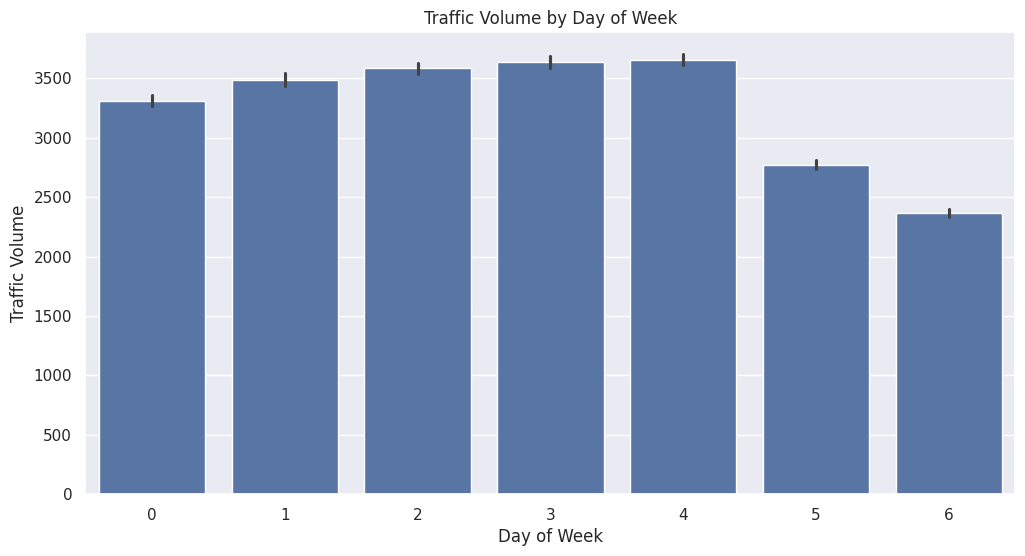

In [ ]:
df['dayofweek'] = df['date_time'].dt.dayofweek
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.barplot(x='dayofweek', y='traffic_volume', data=df)
plt.xlabel('Day of Week')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Day of Week')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Metro_Interstate_Traffic_Volume.csv.gz to Metro_Interstate_Traffic_Volume.csv.gz


In [ ]:
import pandas as pd

df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['dayofweek'] = df['date_time'].dt.dayofweek


In [ ]:
df['is_weekend'] = df['dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')



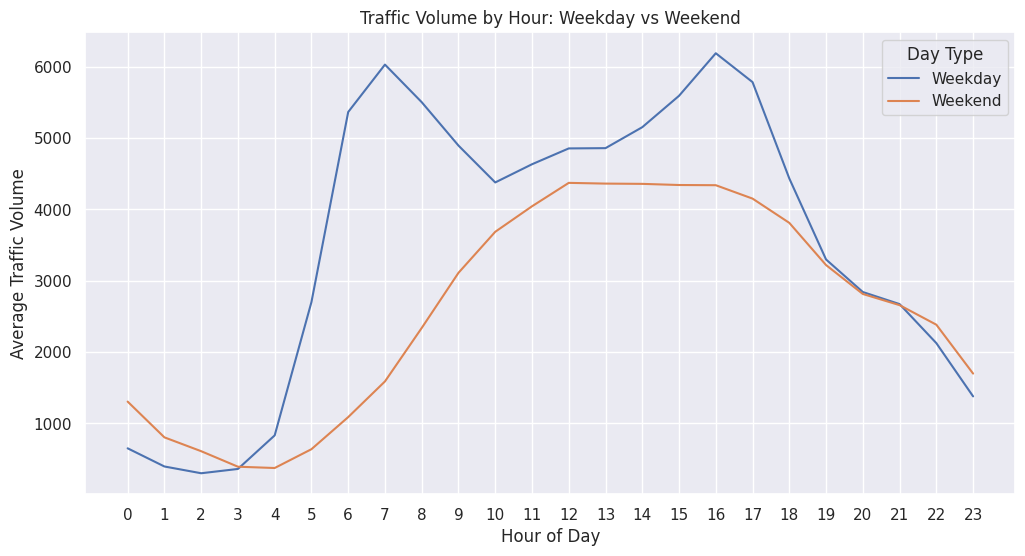

In [ ]:
# Step 1: Create weekend vs weekday column
df['is_weekend'] = df['dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Step 2: Group by hour and is_weekend
hourly_weektype = df.groupby(['hour', 'is_weekend'])['traffic_volume'].mean().reset_index()

# Step 3: Plot the line chart
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")  # Optional: dark theme

plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_weektype, x='hour', y='traffic_volume', hue='is_weekend')
plt.title('Traffic Volume by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(0, 24))
plt.legend(title='Day Type')
plt.show()


In [ ]:
df['weather_main'].unique()



array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [ ]:
weather_traffic = df.groupby('weather_main')['traffic_volume'].mean().reset_index()


/tmp/ipython-input-14-2112929550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_traffic, x='weather_main', y='traffic_volume', palette='viridis')


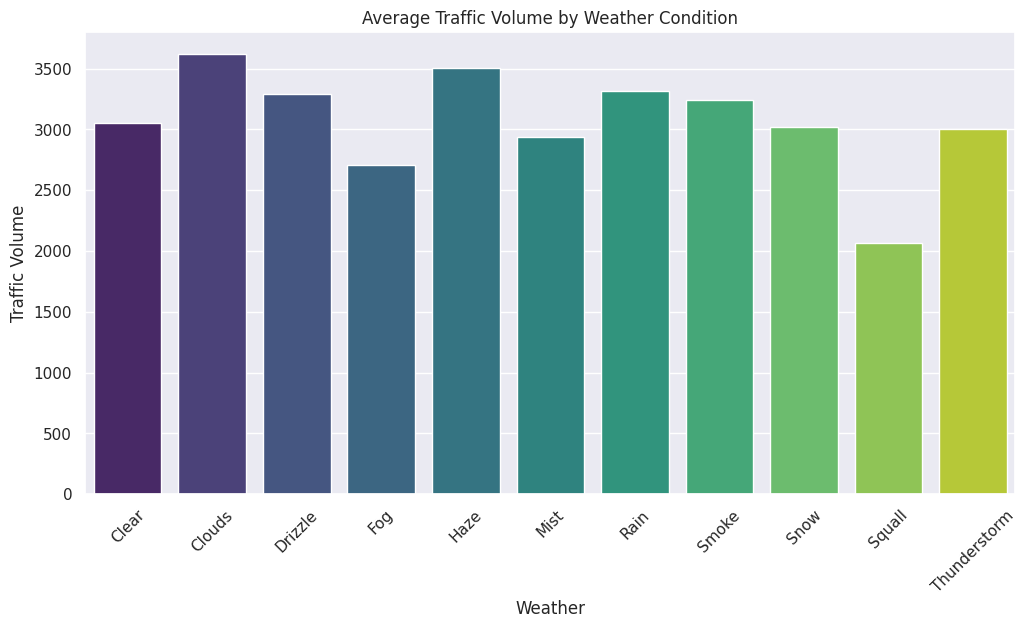

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=weather_traffic, x='weather_main', y='traffic_volume', palette='viridis')
plt.title('Average Traffic Volume by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Metro_Interstate_Traffic_Volume.csv.gz to Metro_Interstate_Traffic_Volume.csv.gz


In [ ]:
import pandas as pd

df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['dayofweek'] = df['date_time'].dt.dayofweek


In [ ]:
df_clean = df[(df['temp_celsius'] > -30) & (df['temp_celsius'] < 50)]


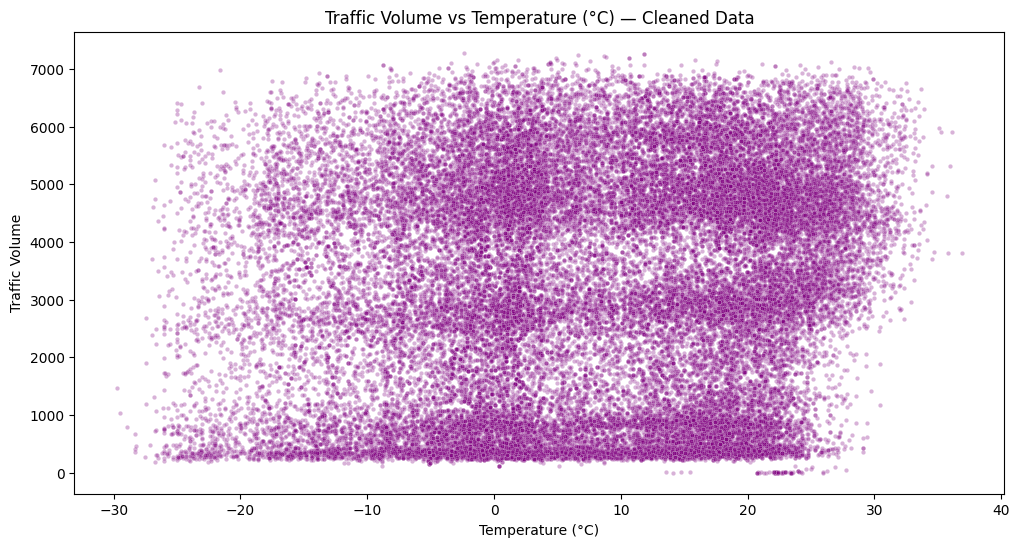

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_clean, x='temp_celsius', y='traffic_volume', alpha=0.3, s=10, color='purple')
plt.title('Traffic Volume vs Temperature (°C) — Cleaned Data')
plt.xlabel('Temperature (°C)')
plt.ylabel('Traffic Volume')
plt.show()


In [ ]:
print(df_clean['rain_1h'].value_counts().sort_index())


rain_1h
0.00       44727
0.25         948
0.26           2
0.27           5
0.28          23
           ...  
28.70          2
31.75          1
44.45          1
55.63          1
9831.30        1
Name: count, Length: 372, dtype: int64


In [ ]:
df_clean['rain_label'] = df_clean['rain_1h'].apply(lambda x: 'Rainy' if x > 0 else 'Not Rainy')


/tmp/ipython-input-9-4104182482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rain_label'] = df_clean['rain_1h'].apply(lambda x: 'Rainy' if x > 0 else 'Not Rainy')


/tmp/ipython-input-10-1996536655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='rain_label', y='traffic_volume', palette='coolwarm')


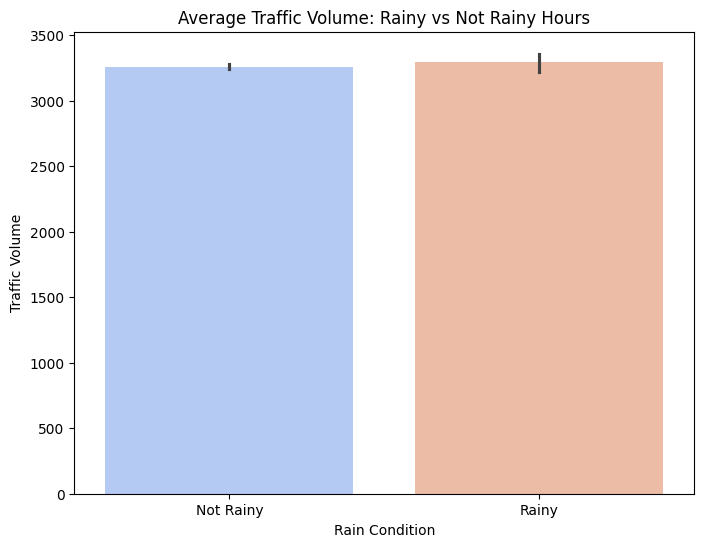

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_clean, x='rain_label', y='traffic_volume', palette='coolwarm')
plt.title('Average Traffic Volume: Rainy vs Not Rainy Hours')
plt.xlabel('Rain Condition')
plt.ylabel('Traffic Volume')
plt.show()


In [ ]:
# Create cloud labels
def classify_clouds(clouds):
    if clouds <= 30:
        return 'Low'
    elif clouds <= 70:
        return 'Medium'
    else:
        return 'High'

# Apply the function to the column
df_clean['cloud_label'] = df_clean['clouds_all'].apply(classify_clouds)


/tmp/ipython-input-11-1582861305.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cloud_label'] = df_clean['clouds_all'].apply(classify_clouds)


/tmp/ipython-input-12-556285770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='cloud_label', y='traffic_volume', palette='cool')


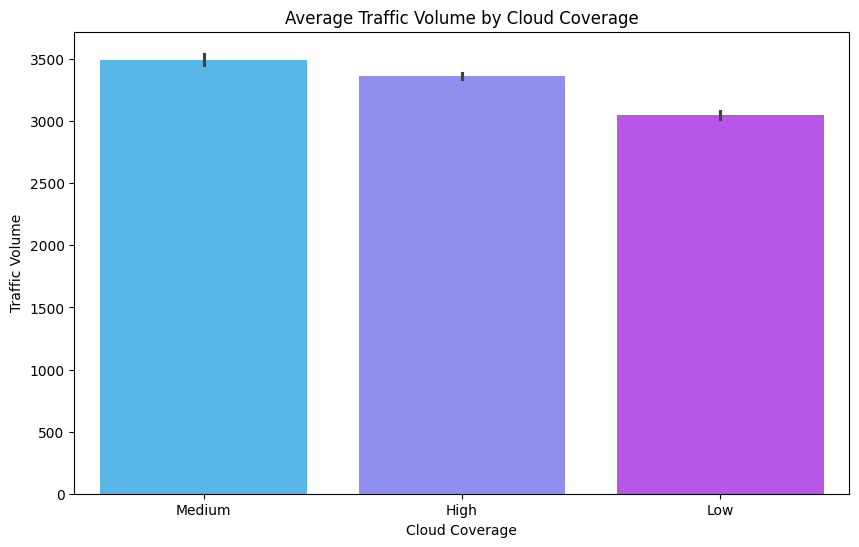

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_clean, x='cloud_label', y='traffic_volume', palette='cool')
plt.title('Average Traffic Volume by Cloud Coverage')
plt.xlabel('Cloud Coverage')
plt.ylabel('Traffic Volume')
plt.show()


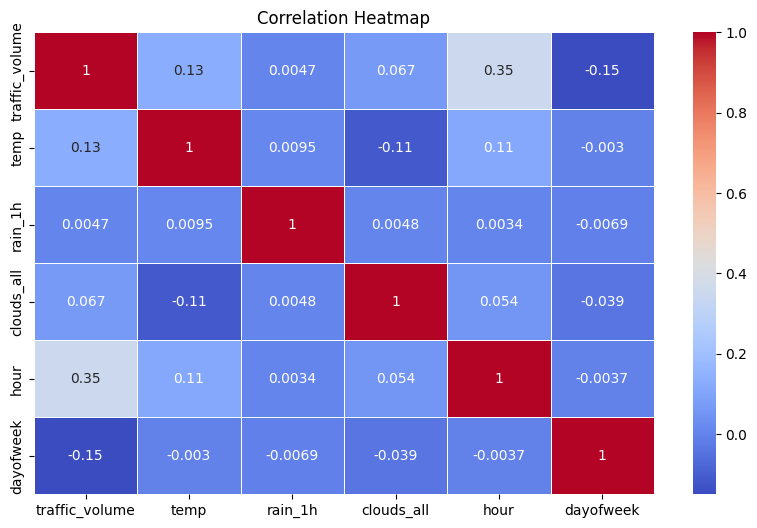

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select numeric columns
numeric_df = df_clean[['traffic_volume', 'temp', 'rain_1h', 'clouds_all', 'hour', 'dayofweek']]
# Compute correlation
corr = numeric_df.corr()
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


***PREPARING THE ML MODEL***

In [ ]:
from sklearn.model_selection import train_test_split  # Library to split data

# Step 4.1: Select features (inputs) and target (output)
features = ['temp', 'rain_1h', 'clouds_all', 'hour', 'dayofweek']  # These are columns in your data
X = df_clean[features]  # X is your features dataframe
y = df_clean['traffic_volume']  # y is your target series

# Step 4.2: Split data into training and test sets
# test_size=0.2 means 20% data for testing, 80% for training
# random_state=42 sets a seed so results are reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Create the Linear Regression model
model = LinearRegression()


In [ ]:
# Train the model on training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict traffic volume for test features
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 1666.87
RMSE: 6640.28
R² Score: -10.12


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)  # 100 trees in the forest


In [ ]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)


In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")


Random Forest MAE: 255.90
Random Forest RMSE: 464.98
Random Forest R² Score: 0.95


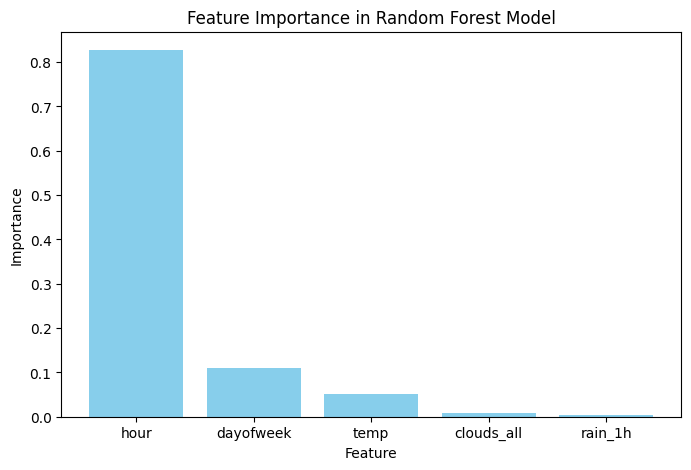

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the model
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plotting
plt.figure(figsize=(8,5))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.title('Feature Importance in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


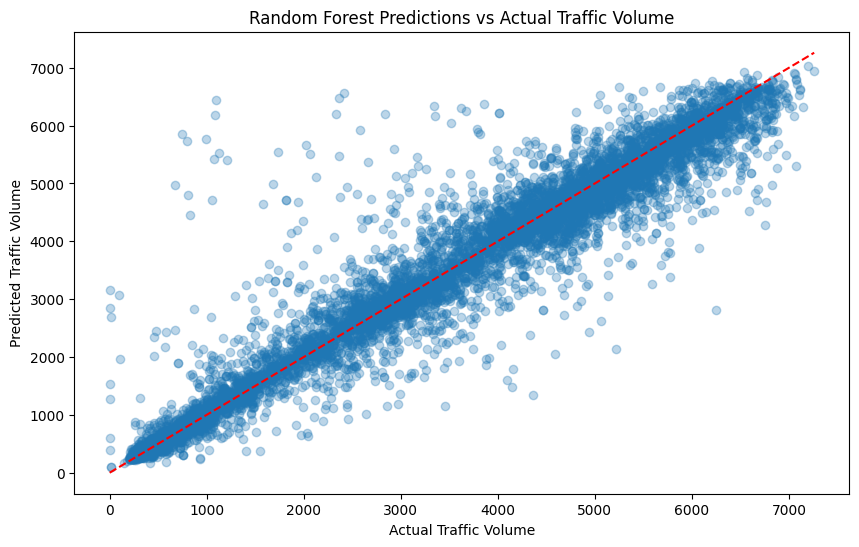

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Random Forest Predictions vs Actual Traffic Volume')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()
